# t-sne 觀察 : 流形還原

# [作業目標]
- 試著模仿範例寫法, 觀察 S 形使用 t-SNE , 在不同困惑度 (perplexity) 下的流形還原效果

# [作業重點]
- 使用 S 形資料集, 觀察 t-sne 在困惑度 (perplexity) 有所不同時, 流形還原的效果如何變化 (In[4], Out[4])
- Hint : ax.scatter(Y[red, 0], Y[red, 1], c="r") 與 ax.scatter(Y[green, 0], Y[green, 1], c="g") 兩行改一行 ax.scatter(Y[:, 0], Y[:, 1], c=color)

In [5]:
# 載入套件
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from matplotlib.ticker import NullFormatter
from sklearn import manifold, datasets
from time import time

circles, perplexity=4 in 0.96 sec
circles, perplexity=6 in 0.95 sec
circles, perplexity=9 in 0.97 sec
circles, perplexity=14 in 1.1 sec
circles, perplexity=21 in 1.2 sec
circles, perplexity=30 in 1.3 sec
circles, perplexity=45 in 1.2 sec
circles, perplexity=66 in 1.6 sec
circles, perplexity=100 in 1.4 sec


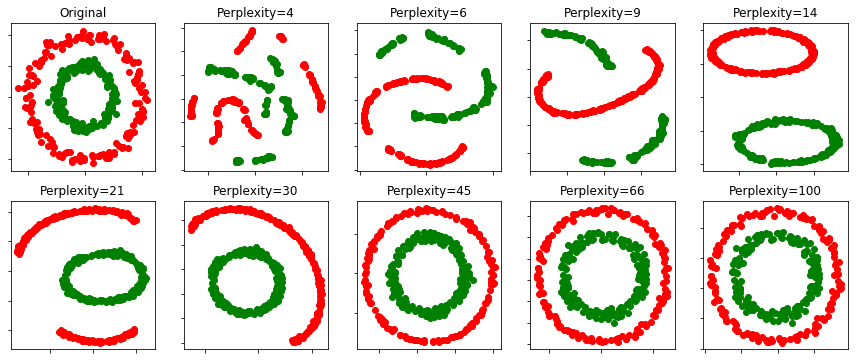

In [6]:
# 設定模型與繪圖參數
n_samples = 300
n_components = 2
(fig, subplots) = plt.subplots(2, 5, figsize=(15, 6))
perplexities = [4, 6, 9, 14, 21, 30, 45, 66, 100]

# 設定同心圓資料點 
X, y = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05)
red = y == 0 # 將 y 為 0 的 index set 存成變數 red
green = y == 1 # 將 y 為 1 的 index set 存成變數 green

ax = subplots[0][0]
ax.set_title("Original")
ax.scatter(X[red, 0], X[red, 1], c="r")
ax.scatter(X[green, 0], X[green, 1], c="g")
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

# 繪製不同 perplexity 下的 t-SNE 分群圖
for i, perplexity in enumerate(perplexities):
    if i<4:
        ax = subplots[0][i+1]
    else:
        ax = subplots[1][i-4]

    t0 = time()
    tsne = manifold.TSNE(n_components=n_components, init='random',
                         random_state=0, perplexity=perplexity)
    Y = tsne.fit_transform(X)
    t1 = time()
    print("circles, perplexity=%d in %.2g sec" % (perplexity, t1 - t0))
    ax.set_title("Perplexity=%d" % perplexity)
    ax.scatter(Y[red, 0], Y[red, 1], c="r")
    ax.scatter(Y[green, 0], Y[green, 1], c="g")
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis('tight')
    
plt.show()

No handles with labels found to put in legend.


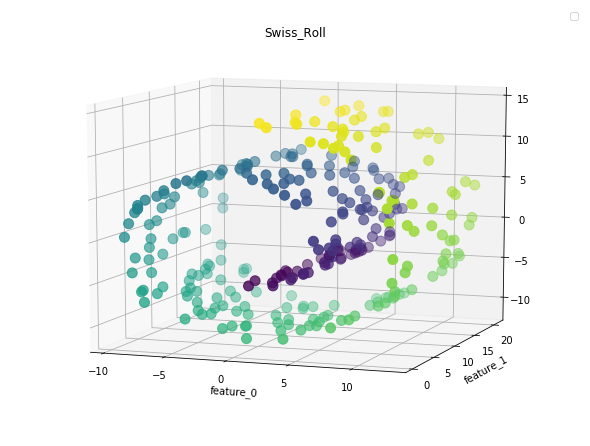

circles, perplexity = 4 in 1.0739295482635498 sec
circles, perplexity = 6 in 1.0469186305999756 sec
circles, perplexity = 9 in 1.0459182262420654 sec
circles, perplexity = 14 in 1.1829731464385986 sec
circles, perplexity = 21 in 1.2359941005706787 sec
circles, perplexity = 30 in 1.4350738525390625 sec
circles, perplexity = 45 in 1.3195273876190186 sec
circles, perplexity = 66 in 1.568126916885376 sec
circles, perplexity = 100 in 1.8932569026947021 sec
circles, perplexity = 150 in 1.9977989196777344 sec
circles, perplexity = 200 in 1.4270706176757812 sec
circles, perplexity = 250 in 1.6041412353515625 sec
circles, perplexity = 260 in 1.5066020488739014 sec
circles, perplexity = 270 in 1.5721287727355957 sec
circles, perplexity = 280 in 1.5116045475006104 sec
circles, perplexity = 290 in 1.7522006034851074 sec
circles, perplexity = 300 in 0.9863946437835693 sec
circles, perplexity = 400 in 1.023409128189087 sec


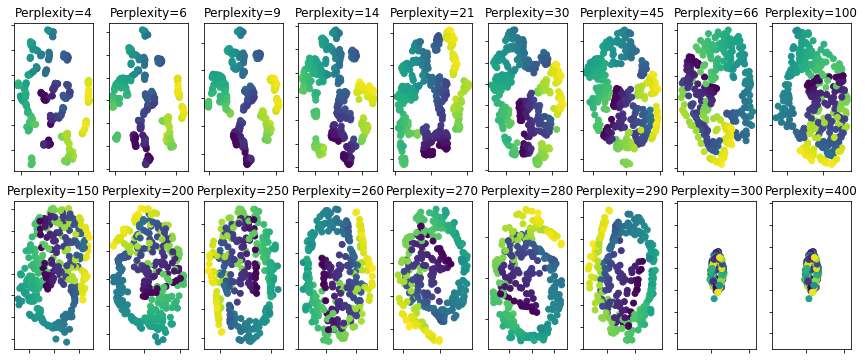

In [7]:
# 設定模型與繪圖參數
n_samples = 300
n_components = 2
perplexities = [4, 6, 9, 14, 21, 30, 45, 66, 100 , 150 , 200 , 250 , 260 , 270 , 280 , 290 , 300 , 400]

X, color = datasets.samples_generator.make_swiss_roll(n_samples, random_state=0)

fignum = 1
fig = plt.figure(fignum, figsize=(4, 3))
ax = Axes3D(fig , rect=[1, 1, 2, 2], elev = 48 , azim = 134)
ax.view_init(10, -70)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], s = 100, c = color)
plt.title('Swiss_Roll')
plt.xlabel('feature_0')
plt.ylabel('feature_1')
plt.legend()
plt.show()


# 繪製資料原圖
(fig, subplots) = plt.subplots(2, 9, figsize=(15, 6))

# 繪製不同 perplexity 下的 t-SNE 分群圖
for i, perplexity in enumerate(perplexities):
    if i < 9:
        ax = subplots[0][i]
    else:
        ax = subplots[1][i-9]

    t0 = time()
    tsne = manifold.TSNE(n_components = n_components ,
                         init='pca',
                         random_state = 0 ,
                         perplexity = perplexity)
    Y = tsne.fit_transform(X)
    t1 = time()
    print("circles, perplexity = {} in {} sec".format(perplexity , t1 - t0))
    
    ax.set_title("Perplexity={}".format(perplexity))
    ax.scatter(Y[:, 0], Y[:, 1], c=color)
#     ax.scatter(Y[green, 0], Y[green, 1], c="g")
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis('tight')
    
plt.show()